# LOAN REPAYMENT PREDICTION

## Exploratory Data Analysis

Importing the required libarries and loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Exploratory Data Analysis

### Countplot of the data so that we can know about the genral overview of loan paid or not 

<AxesSubplot:xlabel='loan_status', ylabel='count'>

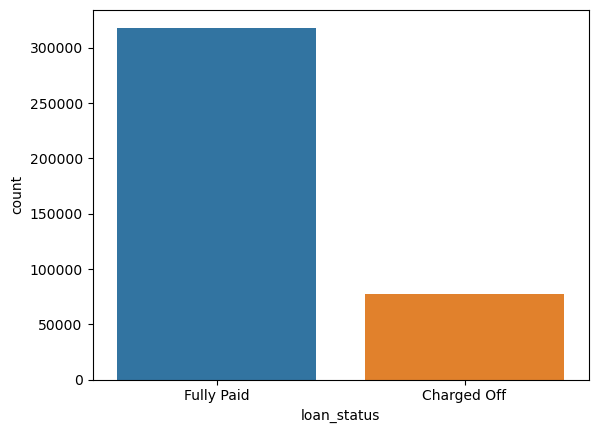

In [4]:
sns.countplot(x='loan_status',data=df)

### Creating a Histogram 

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

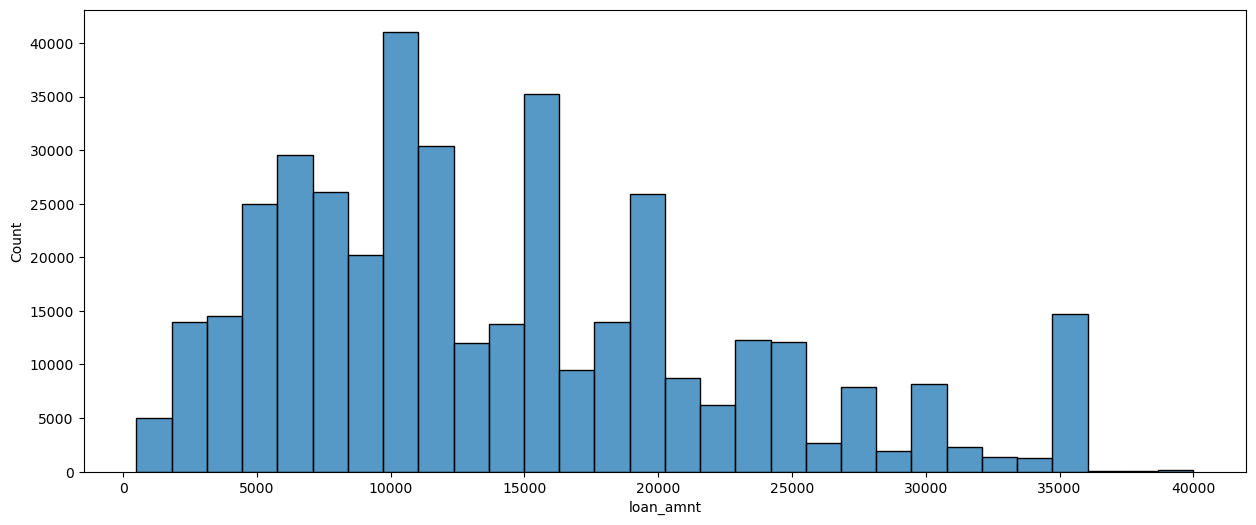

In [5]:
plt.figure(figsize=(15,6))
sns.histplot(df['loan_amnt'],kde=False,bins=30)

### Calculating correlaiton between all the columns 

In [6]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


### Visulaizing the correlations using HeatMap

(12.0, 0.0)

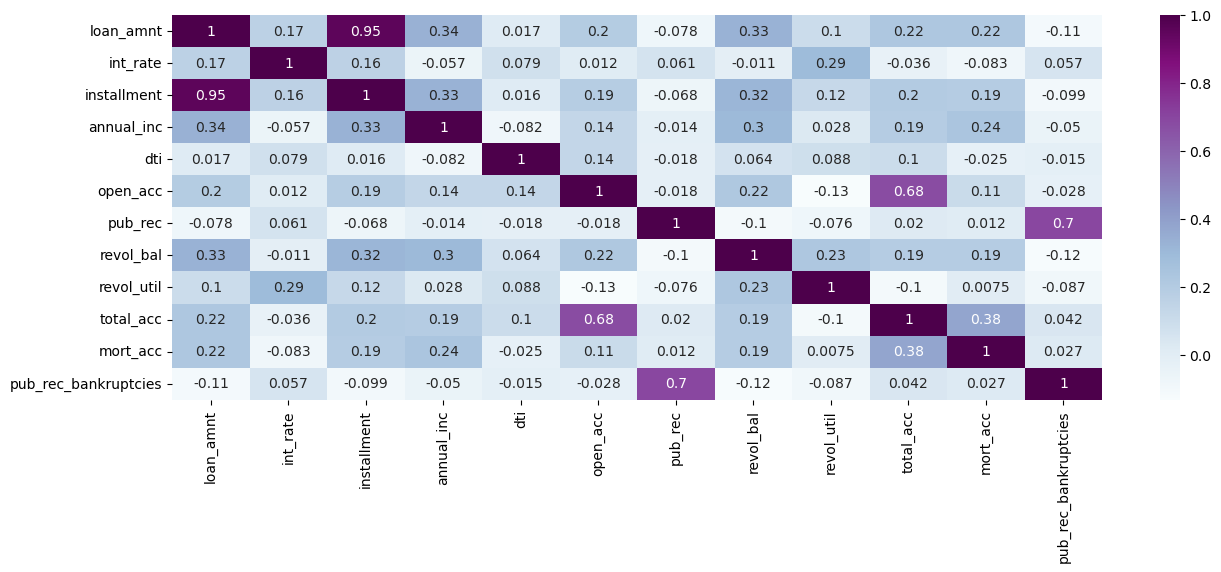

In [7]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap='BuPu')
plt.ylim(12,0)

#### We can observe that loan_amnt having a very high correlation with installment and we know that we cannot have that much of corr and this is beacuse of some type of formula for calculating the installemnt

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

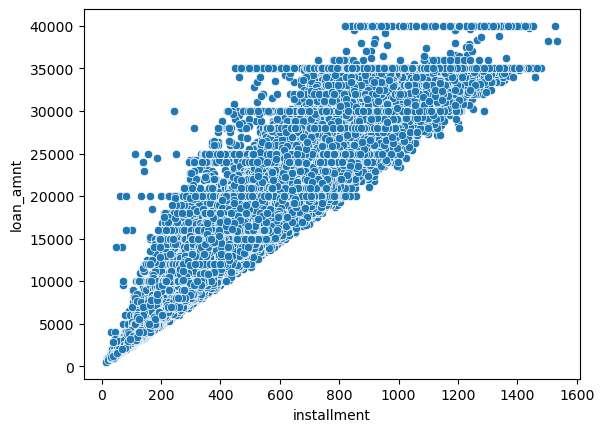

In [8]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

#### We can say that there is no duplicate data but there is a formula to calcutae the installemnt

### Creating a boxplot to view the relation between loan_amnt and paid or charged off

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

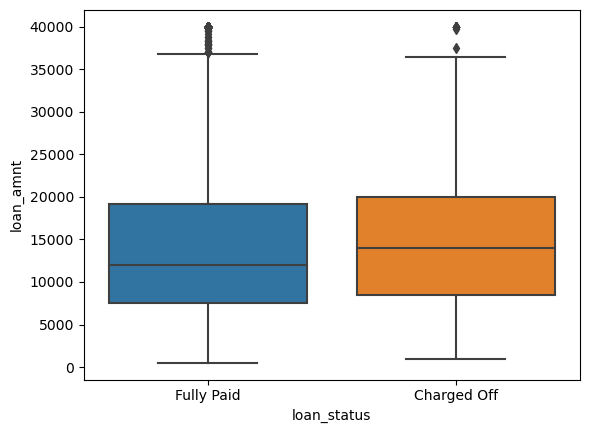

In [9]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

### Calculating the statics for the loan_amnt

In [10]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


#### Mean of loan_amnt is higher for the charged off than the fully paid this implies higher the loan amount  lower the chances of fully paying back 

### Exploring the grade and sub grade columns

#### Unique grades and subgrades


In [11]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [12]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

### Countplot betweeen grade and loan_status

<AxesSubplot:xlabel='grade', ylabel='count'>

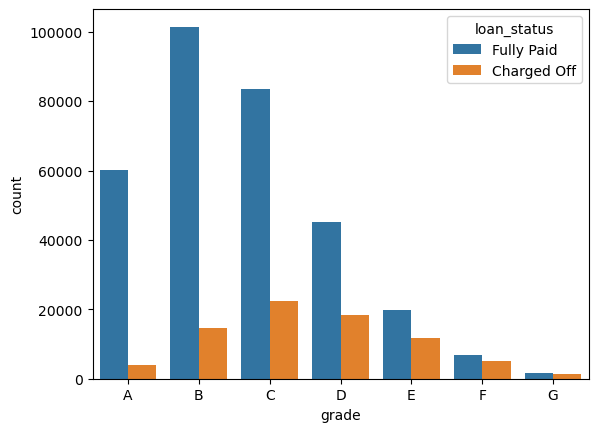

In [13]:
grade_order=sorted(df['grade'].unique())
sns.countplot(x='grade',data=df,hue='loan_status',order=grade_order)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

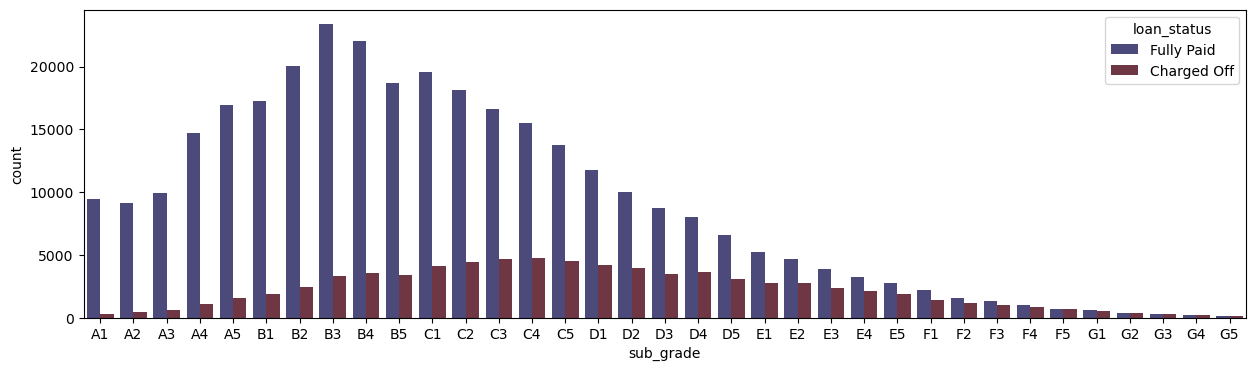

In [14]:
plt.figure(figsize=(15,4))
subgrade_order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,hue='loan_status',order=subgrade_order,palette='icefire')

#### From the above visulaizations we can say that if the grade is better in alphabetical order the the chances of paying of the loan is high and we can see that in F and G there is equal chance of getting loan repaied and not

### It is better to create a new column called loan_repaid so that it contains 0 and 1 for charged off and fully paid  

In [15]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [16]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


### Creating a boxplot to the features and newly created loan_repaid column 

<AxesSubplot:>

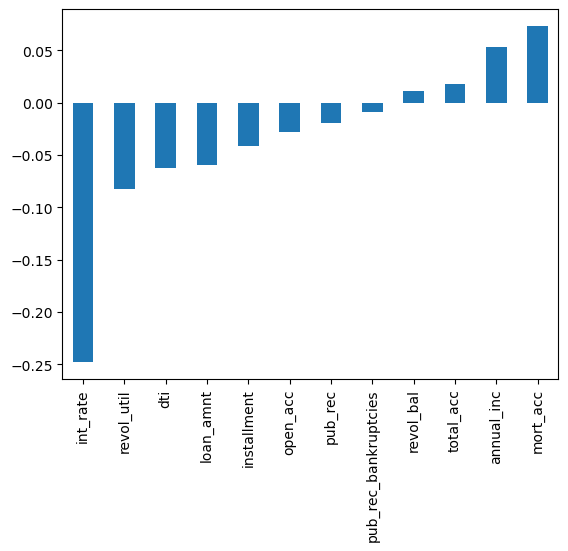

In [17]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

#### We can say that there is a high negative correlation between the intial_rate and loan_repaied column 

### Drop the loan_staus column as it is a duplicate of the loan_repaid column

In [18]:
df = df.drop('loan_status',axis=1)

# Data PreProcessing

### Head of the data

In [19]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


### Total point or length of the dataframe

In [20]:
len(df)

396030

### Count of missing values in each column

In [21]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

### Percenatge of missing data to the toatal data

In [22]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

#### We can observe that emp_title and emp_length have a significant missing data and mort_acc is having a lot of missing data i.e ten percent

### Number of unique emp_title 

In [23]:
df['emp_title'].nunique()

173105

### Number of value counts

In [24]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

#### From the above we can conclude that there are too many job titles and it is not possible for any extra feture engineering for the missing data so it is better to drop the emp_title column from the datafame

In [25]:
df = df.drop('emp_title',axis=1)

In [26]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


### Now we will examine the emp_Length

In [27]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [28]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

### Count plot of emp_length

<AxesSubplot:xlabel='emp_length', ylabel='count'>

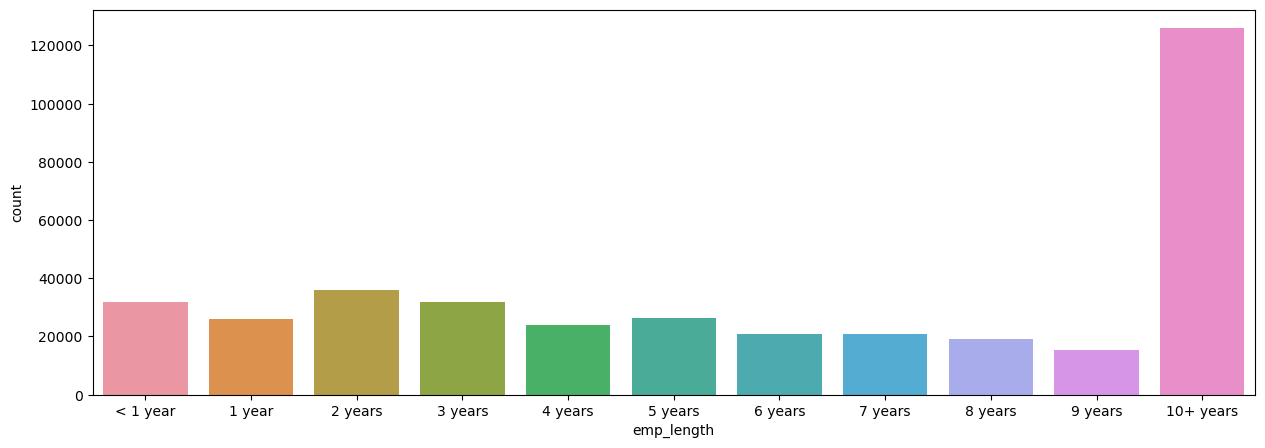

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(x='emp_length',data=df,order=emp_length_order)

#### We can tell that there more number of people taking loans with higher emp_length

### Count plot of emp_length with paid or charged off

<AxesSubplot:xlabel='emp_length', ylabel='count'>

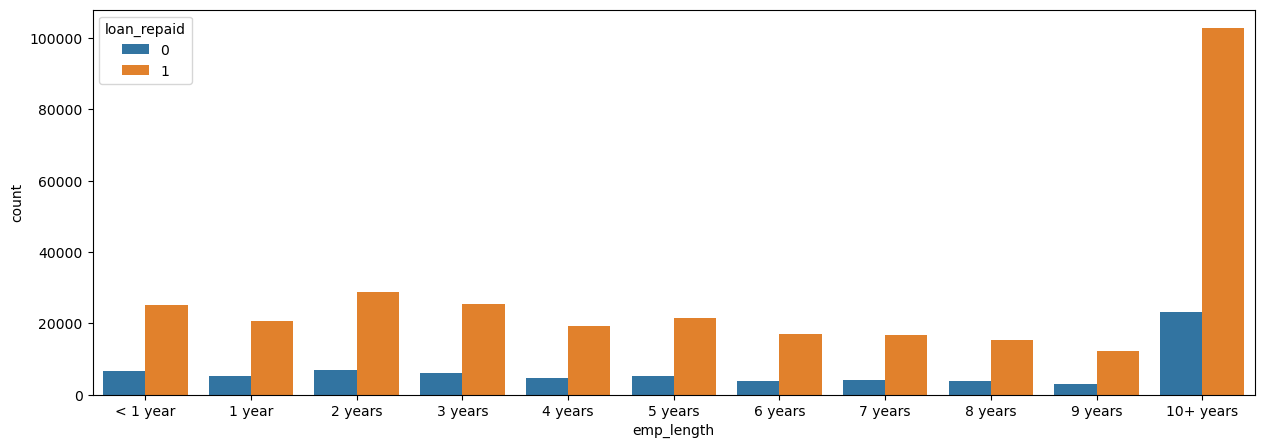

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_repaid')

#### We can see that if the emp_length is more then the chances of paying the loan is high and vice versa but we cannot come to conclusion with the baove so we are going to calculate  percentage of charge offs per category so that we can get which emp_length is paying the loan and which are getting charged off

In [31]:
emp_co = df[df['loan_repaid']==0].groupby("emp_length").count()['loan_repaid']

In [32]:
emp_fp = df[df['loan_repaid']==1].groupby("emp_length").count()['loan_repaid']

In [33]:
emp_len = emp_co/emp_fp

In [34]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_repaid, dtype: float64

### Drawing the barplot for better understanding

<AxesSubplot:xlabel='emp_length'>

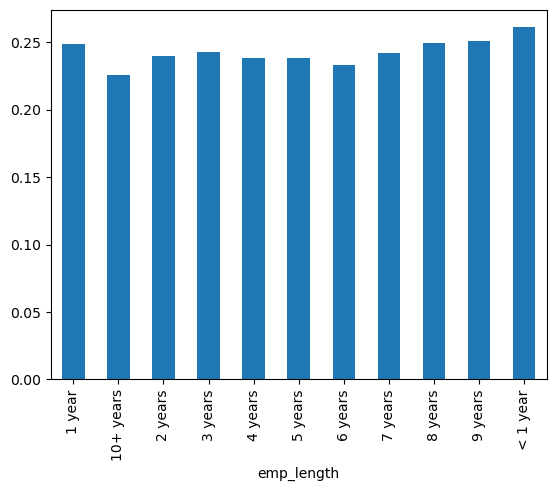

In [35]:
emp_len.plot(kind='bar')

#### From the above we can observe that the charged off rates are very similiar among all employment_lengths so there is nothing we can do about the emp_length missing data so we are going to drop the column

In [36]:
df = df.drop('emp_length',axis=1)

In [37]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

### Now let us examing title column

### Let us compare title and purpose columns

In [38]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [39]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

#### From the above we can observe that title is nothing but a copy or subcateogry kind of thing and has no significant meaning or value to it so it is better to drop the title column

In [40]:
df = df.drop('title',axis=1)

In [41]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

### Now let us examine the mort_acc column

In [42]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

### Let us find the columns highly correlated with mort_acc

In [43]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

#### Here we can see that total_acc feature correlates with the mort_acc

#### Now we will find the mort_acc per total_acc entry grouped by total_acc so that we fill the missing data using the mean

In [44]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

#### Now we can fill the missing values in mort_acc by the mean value of the corresponding total_acc from the above using lambda expression for simplicity

In [45]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [46]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [47]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [48]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

### We can see that revol_util and pub_rec_bankruptcies have missing data but the percenatge is very less i.e less than 0.5 percent so we can forget about them and we can drop the two columns

In [49]:
df = df.dropna()

In [50]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

#### From the above we can say that there is no missing data

### Now let us take a look at the columns that are non-numeric

In [51]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### Now let is take a look at Grade feature and also as we know that grade is a subpart of sungarde we can drop the grade column

In [52]:
df = df.drop('grade',axis=1)

### Now let us take a look at the Term feature

In [53]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

#### From the above it is clear that the term is either 36 months or 60 months so we can just use lambda expression to give either 36 or 60

In [54]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

### Now let us take a look at sub_grade

#### Conver the subgrade into dummy variables and then concate the new columns to the originial dataframe and drop the original subgrade column

In [55]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [56]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

### Now we are going to do the same to the verification_status, application_type, initial_list_status, purpose columns as we did to the subgrade column

In [57]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

### Now let us take a look at the home_ownership column

In [58]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

#### Here also we can do the same as we done before but there is a issue woth other,none and any so we are going to replace none and any with other and get the dummies and add them to the original dataframe

In [59]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [60]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

### Now let us have a look at the Address column

In [61]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

#### Now we can see that the last 5 charcters of the address is the zipcode and zipcode is enough to define the address

#### So we are going to create a zipcode column with the last five charcaters of the address as the values and get the dummies for the zipcode column add the new columns to the original dataframe and remove the original address and zipcode column

In [62]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [63]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

### Now let us look into the issue_id column

In [64]:
df['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 395219, dtype: object

#### This is the date of issuing of the loan it is data leakge beacuse we wouldn't know before whether a loan is issued or not by using the model so we are going to drop this column


In [65]:
df = df.drop('issue_d',axis=1)

### Now let us have a look at earliest_cr_line

In [66]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

#### Its acutally the borrower's earliest reported credit line opned month and year

#### So now we are going to extract the year using lambda expression and then create a column for the year extrcated and then drop the original earliest_cr_line column

In [67]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

### Now let us check if there are any other columns to process

In [68]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

# Splitting the data into train and test data 

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [71]:
print(len(df))

395219


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Normalizing the data

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
scaler = MinMaxScaler()

In [75]:
X_train = scaler.fit_transform(X_train)

In [76]:
X_test = scaler.transform(X_test)

## Creating the Model

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [78]:
model = Sequential()

In [79]:
model = Sequential()



# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [80]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 8s 5ms/step - loss: 0.2997 - val_loss: 0.2648
Epoch 2/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2653 - val_loss: 0.2631
Epoch 3/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2627 - val_loss: 0.2629
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2618 - val_loss: 0.2622
Epoch 5/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2607 - val_loss: 0.2621
Epoch 6/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2603 - val_loss: 0.2614
Epoch 7/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2599 - val_loss: 0.2622
Epoch 8/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2595 - val_loss: 0.2618
Epoch 9/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2593 - val_loss: 0.2613
Epoch 10/25
1236/1236 [==============================] - 6s 4ms/step - loss: 0.259

In [81]:
from tensorflow.keras.models import load_model
model.save('SIN_project_model.h5')  

## Evaluating Model Peformance

In [82]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

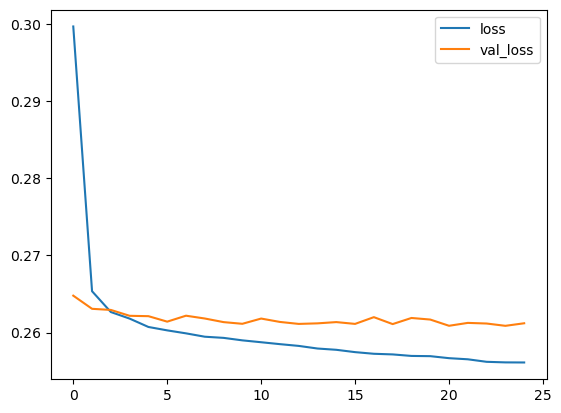

In [83]:
losses[['loss','val_loss']].plot()

In [84]:
from sklearn.metrics import classification_report,confusion_matrix

In [85]:
predictions =(model.predict(X_test) > 0.5).astype("int32")

2471/2471 [==============================] - 5s 2ms/step


In [86]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.44      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [87]:
confusion_matrix(y_test,predictions)

array([[ 6817,  8841],
       [   90, 63296]], dtype=int64)

In [88]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [89]:
(model.predict(new_customer.values.reshape(1,78)) > 0.5).astype("int32")

1/1 [==============================] - 0s 22ms/step


array([[1]])

In [90]:
df.iloc[random_ind]['loan_repaid']

1.0

# Our model prediction and the original prediction is correct
